In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Input Token Length Results

In [147]:
# ACC
xsum_acc_dict = {
    '30' : [0.9749, 0.9770],
    '60' : [0.9617, 0.9675],
    '90' : [0.9323, 0.9430],
}

squad_acc_dict = {
    '30' : [0.9684, 0.9698],
    '60' : [0.9524, 0.9484],
    '90' : [0.9475, 0.9437],
}

writing_acc_dict = {
    '30' : [0.9781, 0.9847],
    '60' : [0.9749, 0.9829],
    '90' : [0.9438, 0.9653],
}

imdb_acc_dict = {
    '30' : [0.9614, 0.9671],
    '60' : [0.9453, 0.9508],
    '90' : [0.9235, 0.9208],
}

index_sample = ['BERT Fine Tuning', 'BERT AT (ours)']

# Xsum
xsum_acc_df = pd.DataFrame(xsum_acc_dict, index = index_sample).reset_index()
xsum_acc_df = xsum_acc_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
xsum_acc_df.rename(columns={'index': 'Method'}, inplace=True)

# SQuAD
squda_acc_df = pd.DataFrame(squad_acc_dict, index = index_sample).reset_index()
squda_acc_df = squda_acc_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
squda_acc_df.rename(columns={'index': 'Method'}, inplace=True)

# WRITING
wirting_acc_df = pd.DataFrame(writing_acc_dict, index = index_sample).reset_index()
wirting_acc_df = wirting_acc_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
wirting_acc_df.rename(columns={'index': 'Method'}, inplace=True)

# IMDB
imdb_acc_df = pd.DataFrame(imdb_acc_dict, index = index_sample).reset_index()
imdb_acc_df = imdb_acc_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
imdb_acc_df.rename(columns={'index': 'Method'}, inplace=True)

In [148]:
# F1
xsum_f1_dict = {
    '30' : [0.9745, 0.9768],
    '60' : [0.9609, 0.9668],
    '90' : [0.9300, 0.9412],
}

squad_f1_dict = {
    '30' : [0.9679, 0.9691],
    '60' : [0.9517, 0.9473],
    '90' : [0.9468, 0.9418],
}

writing_f1_dict = {
    '30' : [0.9784, 0.9848],
    '60' : [0.9752, 0.9828],
    '90' : [0.9425, 0.9650],
}

imdb_f1_dict = {
    '30' : [0.9614, 0.9670],
    '60' : [0.9461, 0.9498],
    '90' : [0.9224, 0.9190],
}

index_sample = ['BERT Fine Tuning', 'BERT AT (ours)']

# Xsum
xsum_f1_df = pd.DataFrame(xsum_f1_dict, index = index_sample).reset_index()
xsum_f1_df = xsum_f1_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
xsum_f1_df.rename(columns={'index': 'Method'}, inplace=True)

# SQuAD
squda_f1_df = pd.DataFrame(squad_f1_dict, index = index_sample).reset_index()
squda_f1_df = squda_f1_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
squda_f1_df.rename(columns={'index': 'Method'}, inplace=True)

# WRITING
wirting_f1_df = pd.DataFrame(writing_f1_dict, index = index_sample).reset_index()
wirting_f1_df = wirting_f1_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
wirting_f1_df.rename(columns={'index': 'Method'}, inplace=True)

# IMDB
imdb_f1_df = pd.DataFrame(imdb_f1_dict, index = index_sample).reset_index()
imdb_f1_df = imdb_f1_df.melt(id_vars='index', var_name='Input Token Length', value_name='Score')
imdb_f1_df.rename(columns={'index': 'Method'}, inplace=True)

In [149]:
dfs = {
    'Xsum': xsum_f1_df,
    'SQuAD': squda_f1_df,
    'WRITING': wirting_f1_df,
    'IMDB': imdb_f1_df,
    'Xsum_f1': xsum_acc_df,
    'SQuAD_f1': squda_acc_df,
    'WRITING_f1': wirting_acc_df,
    'IMDB_f1': imdb_acc_df
}

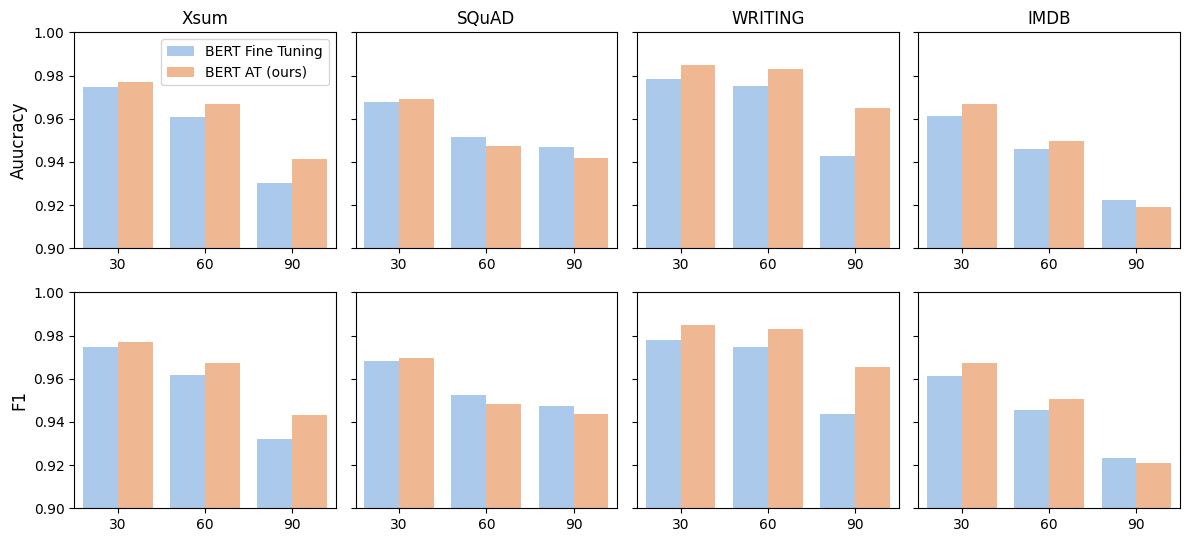

In [170]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6), sharey=True)
# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Loop through the flattened axes and datasets to create subplots for each DataFrame
for ax, (dataset, df) in zip(axes_flat, dfs.items()):
    sns.barplot(data=df, x='Input Token Length', y='Score', hue='Method', ax=ax, palette="pastel")
    if dataset in ['Xsum', 'SQuAD', 'WRITING', 'IMDB']:
        ax.set_title(dataset)
    ax.set_ylim(0.9, 1.0)  # Setting the ylim for each subplot
    ax.legend_.remove()
    
    ax.set_xlabel(None)
    
    if 'f1' in dataset:
        ax.set_ylabel('F1', fontsize = 12)
    else:
        ax.set_ylabel('Auucracy', fontsize = 12)

# Only keep the legend on the first plot for clarity
axes_flat[0].legend(loc = 'upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to fit all components and the title

plt.show()